In [70]:
import numpy as np
from matplotlib import pyplot as plt
import csv

%matplotlib inline

import lib_ecofun as lef
from importlib import reload
reload(lef)
from scipy.optimize import curve_fit, minimize

# Recover old result

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
0.003408921792197812


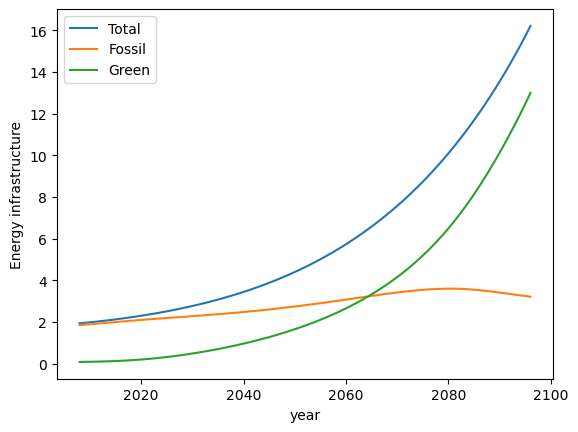

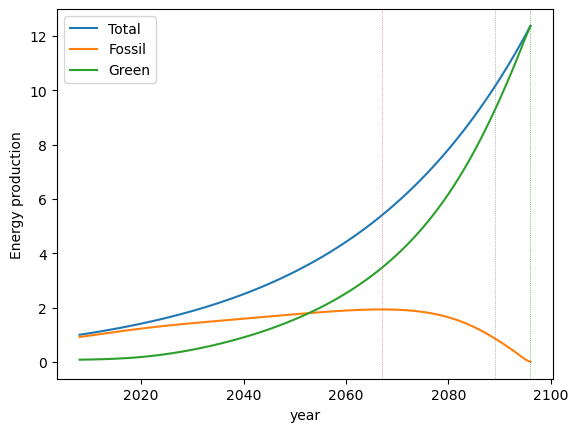

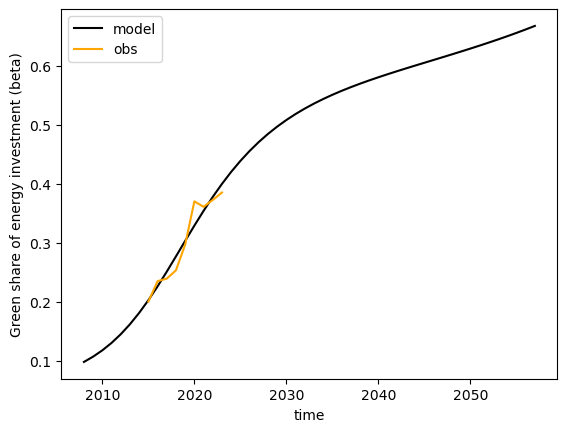

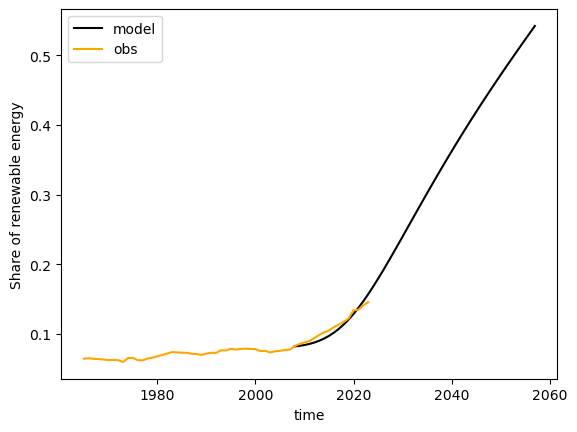

In [71]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
oks = [-1.381e-01, 1.095e-01, 9.961e-01, 2.124e-01]

for par, parval in zip(parnames, oks):
    params[par] = parval

resu_old = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008, extend_constant=False)
lef.plot_resu(resu_old, year_ini = 2008)
lef.plot_resuvsobs(resu_old, year_ini = 2008)

obs = dict()
obs['Ig_ratio'] = lef.Ig_obs/(lef.Ig_obs+lef.If_obs)
obs['Eg_ratio'] = lef.Eg_ratio
cost = lef.costfun(resu_old, obs)#, weights = weights)
print(cost)


# Starting point of minimize

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
1.8427727164959056


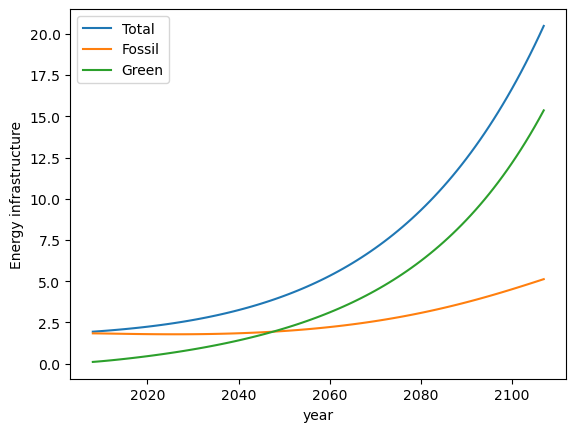

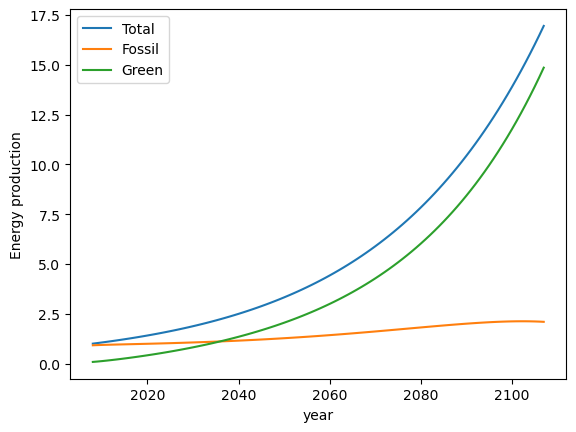

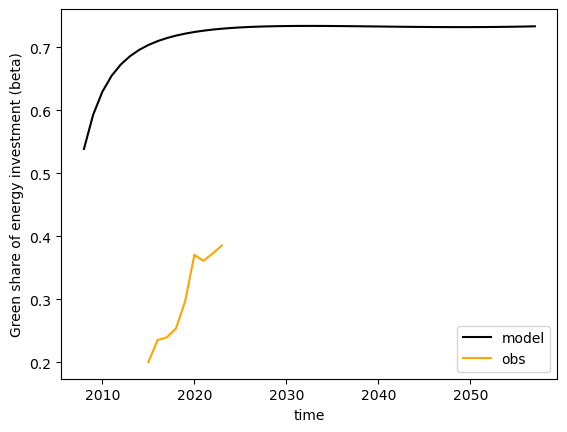

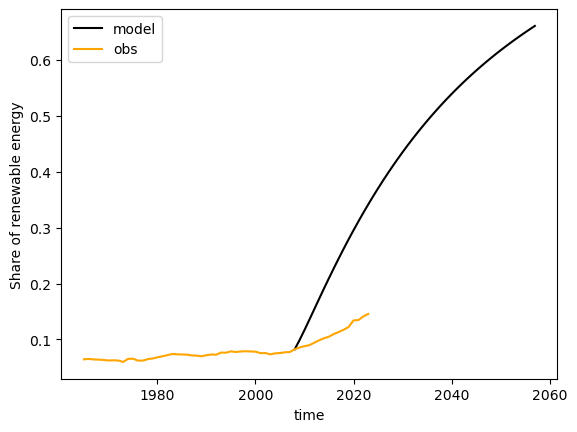

In [75]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
#oks = [-1.381e-01, 1.095e-01, 9.961e-01, 2.124e-01]
oks = [0.2, 0.1, 1., 0.7]

for par, parval in zip(parnames, oks):
    params[par] = parval

resu = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008, extend_constant=False)
lef.plot_resu(resu, year_ini = 2008)
lef.plot_resuvsobs(resu, year_ini = 2008)

obs = dict()
obs['Ig_ratio'] = lef.Ig_obs/(lef.Ig_obs+lef.If_obs)
obs['Eg_ratio'] = lef.Eg_ratio
cost = lef.costfun(resu, obs)#, weights = weights)
print(cost)

## Best fit with obs. Ig_ratio (2015-2023) and Eg_ratio (2008-2023). 2008 starting point (could be earlier)

In [76]:
parnames = ['beta_0', 'r_inv', 'a', 'delta_sig']
initial_guess = [0.2, 0.1, 1., 0.7]#, 1.]
bounds = [(-0.5, 0.5), (0.01, 0.4), (0.5, 1.5), (0.2, 2.)]#, (0.5, 1.5)]

params = lef.default_params.copy()
print(params)
print('-------------')
params['growth'] = 0.029 # fixing Growth!

# Step 5: Use an optimization function to find the best parameters
result = minimize(lef.cost_function, initial_guess, bounds = bounds, args = (parnames, params, 2008, lef.inicond_yr(2008), False), tol = 1e-10)
print(result)

{'growth': 0.01, 'eps': 1, 'a': 1, 'b': 1, 'gamma_f': 0.5, 'gamma_g': 0.5, 'eta_g': 0.2, 'eta_f': 0.2, 'h_g': 0.5, 'h_f': 0.5, 'r_inv': 0.1, 'beta_0': 0.2, 'delta_sig': 0.5, 'delta_g': 0.01, 'delta_f': 0.01, 'f_heavy': 0.1}
-------------
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.20000001, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.10000001, 'a': 1.0, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.00000001, 'delta_sig': 0.7}
---------------------
{'beta_0': 0.2, 'r_inv': 0.1, 'a': 1.0, 'delta_sig': 0.70000001}
---------------------
{'beta_0': -0.5, 'r_inv': 0.01, 'a': 0.5, 'delta_sig': 2.0}
---------------------
{'beta_0': -0.49999999, 'r_inv': 0.01, 'a': 0.5, 'delta_sig': 2.0}
---------------------
{'beta_0': -0.5, 'r_inv': 0.01000001, 'a': 0.5, 'delta_sig': 2.0}
---------------------
{'beta_0': -0.5, 'r_inv': 0.01, 'a': 0.50000001, 'del

In [77]:
obs

{'Ig_ratio': <xarray.DataArray (year: 9)>
 array([0.20060606, 0.23529412, 0.23959044, 0.25370121, 0.2972973 ,
        0.37059265, 0.36128581, 0.37296621, 0.38560562])
 Coordinates:
   * year     (year) int64 2015 2016 2017 2018 2019 2020 2021 2022 2023,
 'Eg_ratio': <xarray.DataArray (year: 59)>
 array([0.06445519, 0.06516204, 0.06423987, 0.06390145, 0.0632996 ,
        0.06240231, 0.06275118, 0.06231038, 0.0598148 , 0.06527657,
        0.06561374, 0.06222023, 0.06216026, 0.06474634, 0.06588326,
        0.06803658, 0.06985936, 0.07187162, 0.07396094, 0.07347961,
        0.07309479, 0.07285027, 0.07142948, 0.0710847 , 0.06987618,
        0.07182692, 0.07301195, 0.07286488, 0.07653918, 0.07632168,
        0.07871824, 0.07755703, 0.07847491, 0.07890869, 0.07853059,
        0.07815846, 0.07552836, 0.07566855, 0.07334207, 0.07518   ,
        0.0756382 , 0.07705343, 0.07747336, 0.08245706, 0.08564856,
        0.08797048, 0.08980997, 0.09414955, 0.09847355, 0.10218171,
        0.10504495, 0.1

Plotting only data regarding investment on green power production (only part of what world bank considers green investment)
0.003266504015047392


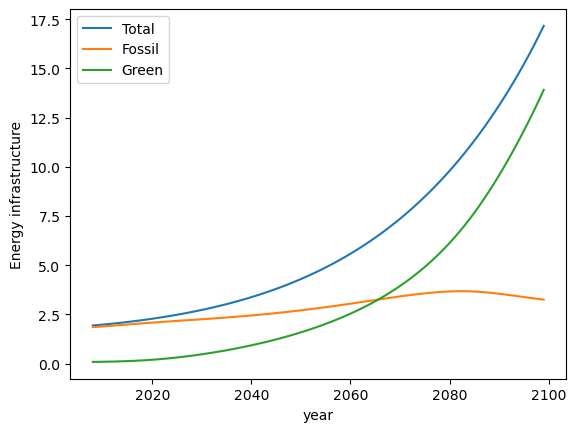

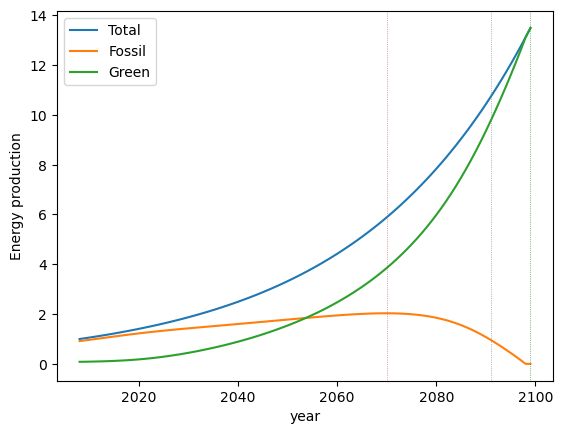

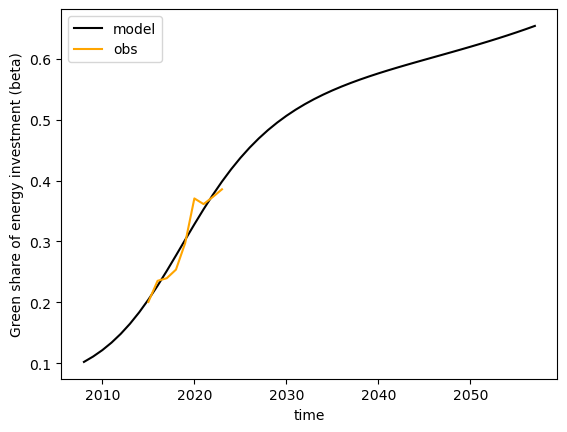

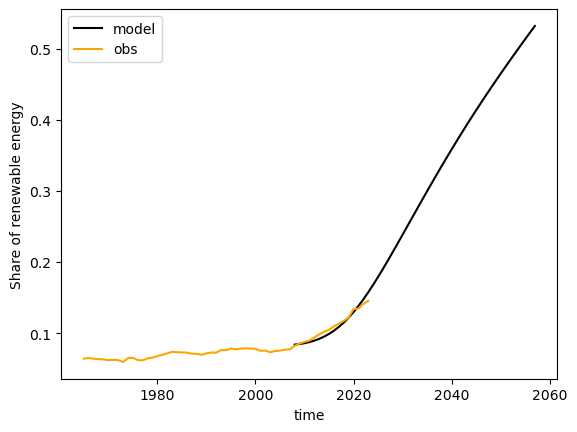

In [78]:
params = lef.default_params.copy()
params['growth'] = 0.029 # fixing Growth!

for par, parval in zip(parnames, result.x):
    params[par] = parval

resu = lef.run_model(inicond = lef.inicond_yr(2008), params = params, n_iter = 100, verbose = False, rule = 'maxgreen', year_ini = 2008)
lef.plot_resu(resu, year_ini = 2008)
lef.plot_resuvsobs(resu, year_ini = 2008)

yini = 2008
#print(yini + resu['year_peak'], yini + resu['year_halved'], yini + resu['year_zero'])

cost = lef.costfun(resu, obs)#, weights = weights)
print(cost)